# KNN Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances 
import operator

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

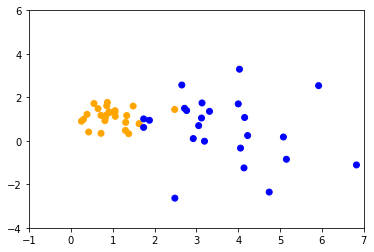

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [5]:
test_n1, test_n2 = 100, 100
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

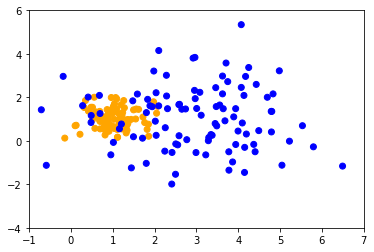

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [7]:
def knnClassify_fast(train_data, train_labels, test_data, k=1):
    distances = euclidean_distances(test_data,train_data)
    pred_labels = np.zeros(len(test_data))
    for i, d in enumerate(distances):
        k_smallest_idx = np.argpartition(d, k)[:k]
        neighbour_classes = train_labels[k_smallest_idx]
        unique, counts = np.unique(neighbour_classes, return_counts = True)
        neighbour_classes_count = dict(zip(unique, counts))
        pred_class = max(neighbour_classes_count.items(), key=operator.itemgetter(1))[0]
        pred_labels[i] = pred_class
    return pred_labels
        

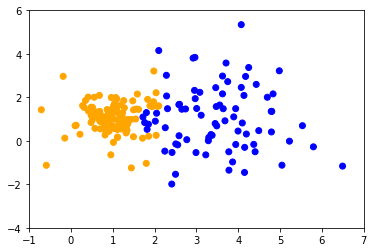

In [8]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = np.zeros(len(test_data))
    
    for i, ix in enumerate(test_data): #list(range(1, len(test_data))):       
        
        neighbours = []
        for j, jx in enumerate(train_data): #list(range(1, len(train_data))):

            d = np.sqrt((ix[0] - jx[0])**2 + (ix[1] - jx[1])**2)
            neighbours.append([d, j])
            
        neighbours = sorted(neighbours, key = lambda x: x[0])
        neighbours = neighbours[0:k]
        
        blue_class = []
        orange_class = []
        
        for n in neighbours:
            nn = n[1]      # Index 
            if train_labels[nn] == 1:
                orange_class.append(train_labels[nn])
            else:
                blue_class.append(train_labels[nn])
        
        if len(blue_class) < len(orange_class):
            pred_labels[i] = 1
        else:
            pred_labels[i] = 2
    return pred_labels

fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in knnClassify(train_data, train_labels, test_data, k=3)]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## c)

Plot the correct predictions in black and the wrong one in red

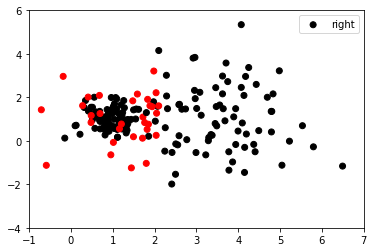

In [9]:
def comparison(test_labels, pred_labels):
    comparison_list = np.zeros(len(test_labels))
    for i in range(len(test_labels)):
        if test_labels[i] == pred_labels[i]:
            comparison_list[i] = 1
        else:
            comparison_list[i] = 0
    return comparison_list

prediction_list = knnClassify(train_data, train_labels, test_data, k=3)
comp_list = comparison(test_labels, prediction_list)
fig = plt.figure()
color = ['black' if r == 1 else 'red' for r in comp_list]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.legend(('right', 'wrong'))
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()        

Expectation: Blue points in the orange region are difficult to classify. Outliers and dots near the border between the point clouds as well. Yes, the plot matches.

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [10]:
def empRiskWith01loss(test_labels, pred_labels):
    error = 0
    for i, _ in enumerate(pred_labels):
        if pred_labels[i] == test_labels[i]:
            error = error
        else:
            error += 1    
    return error / len(pred_labels)

Compute the risk for various k and plot it

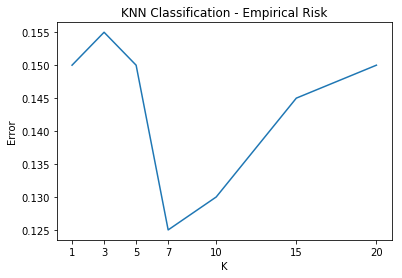

In [11]:
ks = [1, 3, 5, 7, 10, 15, 20]
risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k = k)
    risk.append(empRiskWith01loss(test_labels, pred_labels))
    
fig = plt.figure()
plt.plot(ks, risk)
plt.title("KNN Classification - Empirical Risk")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks(ks)
plt.show()

We would use $k = 7$. It has the least empirical risk on the test set.

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [12]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

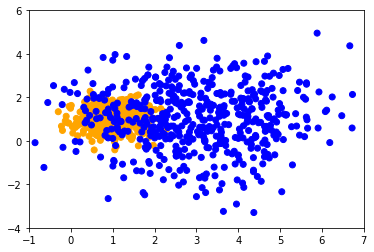

In [13]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

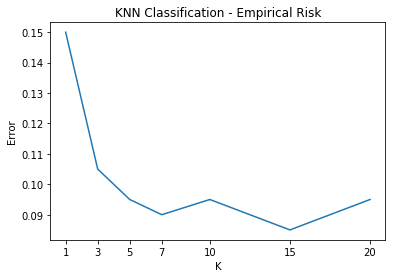

In [14]:
ks = [1, 3, 5, 7, 10, 15, 20]
risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k = k)
    risk.append(empRiskWith01loss(test_labels, pred_labels))
    
fig = plt.figure()
plt.plot(ks, risk)
plt.xticks(ks)
plt.title("KNN Classification - Empirical Risk")
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

We would use $k = 15$ in this case. Because of the size of the training dataset we have to choose a larger $k$ in order to get a good fit. In the first training set a large $k$ leads to an underfitting because we take nearly every data point into consideration. In the larger training set we need a larger $k$ in order not to overfit the data.

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [15]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

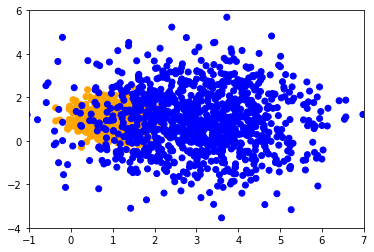

In [16]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

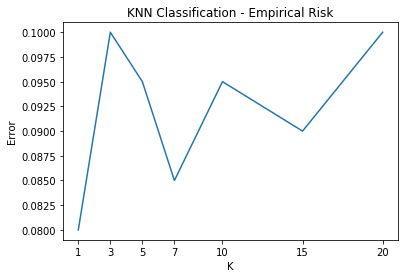

In [17]:
ks = [1, 3, 5, 7, 10, 15, 20]
risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k = k)
    risk.append(empRiskWith01loss(test_labels, pred_labels))
    
fig = plt.figure()
plt.plot(ks, risk)
plt.xticks(ks)
plt.title("KNN Classification - Empirical Risk")
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

Unexpected behaviour: Against our assumption of overfitting and underfitting $k = 1$ has the least empirical risk. With more and more training data points we get better approximation of the real distribution. This makes the class of the nearest neighbour to best prediction. 

# Digit Classification

In [18]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

In [19]:
train_data.shape

(10000, 256)

The training dataset contains 10000 images (rows); each consists of $256 = 16 \times 16$ pixels (columns).

## a)

Find out if the dataset is balanced

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


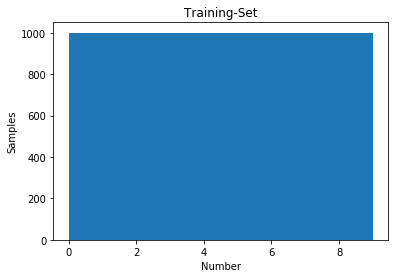

In [20]:
unique, counts = np.unique(train_labels, return_counts = True)
print(dict(zip(unique, counts)))

fig = plt.figure()
plt.title("Training-Set")
plt.xlabel("Number")
plt.ylabel("Samples")
plt.hist(train_labels)
plt.show()

{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


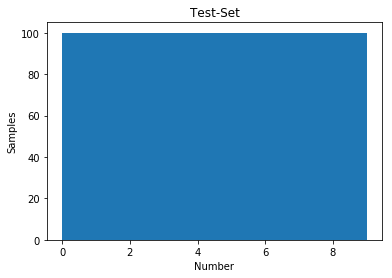

In [21]:
unique, counts = np.unique(test_labels, return_counts = True)
print(dict(zip(unique, counts)))

fig = plt.figure()
plt.title("Test-Set")
plt.xlabel("Number")
plt.ylabel("Samples")
plt.hist(test_labels)
plt.show()

Both data sets are balanced.

## b)

Compute knn for the USPS dataset

In [22]:
ks = range(1,20)

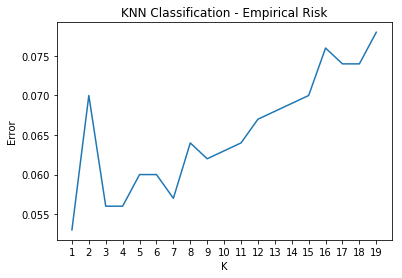

In [23]:
risk = []

for k in ks:
    pred_labels = knnClassify_fast(train_data, train_labels, test_data, k = k)
    risk.append(empRiskWith01loss(test_labels, pred_labels))
    
fig = plt.figure()
plt.plot(ks, risk)
plt.xticks(ks)
plt.title("KNN Classification - Empirical Risk")
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

As before ,$k = 1$ has the least empirical risk for the handwritten digits test-dataset. 